In [205]:
import pandas as pd

In [206]:
import requests 

In [42]:
import json

In [51]:
with open('data2007_02_18.json', 'w') as outfile:  
    json.dump(data, outfile)

In [57]:
import datetime

In [71]:
def monthdelta(date, delta):
    m, y = (date.month+delta) % 12, date.year + ((date.month)+delta-1) // 12
    if not m: m = 12
    d = min(date.day, [31,
        29 if y%4==0 and not y%400==0 else 28,31,30,31,30,31,31,30,31,30,31][m-1])
    return date.replace(day=d,month=m, year=y)

for m in range(4, 72):
    date = monthdelta(datetime.date(2007,1,18), m)
    date_str = date.strftime('%Y-%m-%d')
    URL = "https://openexchangerates.org/api/historical/"+date_str+".json?app_id=YOUR_APP_ID"
    r = requests.get(url = URL)
    data[m] = r.json()
    with open('data'+date_str+'.json', 'w') as outfile:  
        json.dump(data[m], outfile)
    
#    print(monthdelta(datetime.date(2007,1,18), m))

In [89]:
curr = ["HUF", "CZK", "CHF", "JPY", "BRL", "ARS", "RUB", "EUR","IRR", "CAD", "VND", "RON", "AUD"]

In [127]:
curr_list = []
for m in range(0, 72):
    date = monthdelta(datetime.date(2007,1,18), m)
    date_str = date.strftime('%Y-%m-%d')
    #URL = "https://openexchangerates.org/api/historical/"+date_str+".json?app_id=98bdc993fe594ea7ad676d3d05b51b3a"
    #r = requests.get(url = URL)
    #data[m] = r.json()
    with open('data'+date_str+'.json') as f:
        data = json.load(f)
    day_list = []
    for i in curr:
        day_list.append(data['rates'][i])
    curr_list.append(day_list)       
print(curr_list)
    #print()

[[195.130906, 21.527171, 1.248756, 121.297917, 2.130998, 3.076327, 26.523715, 0.772396, 9234.430739, 1.174936, 16058.006655, 2.615967, 1.269173], [195.130906, 21.527171, 1.248756, 121.297917, 2.130998, 3.076327, 26.523715, 0.772396, 9234.430739, 1.174936, 16058.006655, 2.615967, 1.269173], [187.06883, 20.917066, 1.206289, 116.764296, 2.091046, 3.099474, 26.135685, 0.750885, 9242.289081, 1.174604, 16010.021538, 2.515931, 1.256931], [181.417902, 20.610442, 1.205436, 118.451296, 2.036869, 3.081399, 25.833331, 0.736535, 9243.108087, 1.130365, 16038.044487, 2.463946, 1.197786], [185.978614, 20.915881, 1.227067, 121.059222, 1.964496, 3.080548, 25.741229, 0.740619, 9253.594828, 1.091645, 16044.980856, 2.428583, 1.21465], [186.611224, 21.329664, 1.240898, 123.56146, 1.898977, 3.067906, 25.906851, 0.74586, 9275.263802, 1.072297, 16115.005595, 2.401882, 1.187181], [178.456389, 20.493069, 1.201225, 121.967367, 1.861711, 3.101144, 25.471815, 0.724813, 9276.009907, 1.045076, 16130.389578, 2.274359,

In [108]:
curr_list[:][0]

[195.130906,
 21.527171,
 1.248756,
 121.297917,
 2.130998,
 3.076327,
 26.523715,
 0.772396,
 9234.430739,
 1.174936,
 16058.006655,
 2.615967,
 1.269173]

In [159]:
len(curr_list[0])

13

In [73]:
with open('data2007-03-18.json') as f:
        data = json.load(f)

In [164]:
import pandas as pd 

In [165]:
df = pd.DataFrame(curr_list,columns=curr)

In [169]:
average = df.mean()

In [170]:
average

HUF      198.922887
CZK       18.782129
CHF        1.039410
JPY       93.708255
BRL        1.862954
ARS        3.763977
RUB       28.856878
EUR        0.731281
IRR    10210.782066
CAD        1.049936
VND    18469.647508
RON        2.955727
AUD        1.116965
dtype: float64

In [171]:
norm_cur = df/average

In [172]:
norm_cur

,HUF,CZK,CHF,JPY,BRL,ARS,RUB,EUR,IRR,CAD,VND,RON,AUD
0,0.980937,1.146152,1.201408,1.294421,1.143881,0.817308,0.919147,1.056223,0.904380,1.119055,0.869427,0.885050,1.136270
1,0.980937,1.146152,1.201408,1.294421,1.143881,0.817308,0.919147,1.056223,0.904380,1.119055,0.869427,0.885050,1.136270
2,0.940409,1.113669,1.160552,1.246041,1.122436,0.823457,0.905700,1.026807,0.905150,1.118739,0.866829,0.851205,1.125310
3,0.912001,1.097343,1.159731,1.264043,1.093354,0.818655,0.895223,1.007184,0.905230,1.076604,0.868346,0.833618,1.072358
4,0.934928,1.113605,1.180542,1.291874,1.054506,0.818429,0.892031,1.012769,0.906257,1.039725,0.868722,0.821653,1.087456
5,0.938108,1.135636,1.193848,1.318576,1.019336,0.815070,0.897770,1.019936,0.908379,1.021298,0.872513,0.812620,1.062864
6,0.897113,1.091094,1.155680,1.301565,0.999333,0.823901,0.882695,0.991155,0.908452,0.995371,0.873346,0.769475,1.020579
7,0.967361,1.095220,1.161499,1.214016,1.086994,0.838952,0.899557,1.015597,0.907782,1.016826,0.879171,0.825891,1.137322
8,0.919157,1.053682,1.141259,1.235447,1.020603,0.833061,0.875984,0.982418,0.911986,0.972497,0.878197,0.822200,1.064137
9,0.882626,1.020851,1.124594,1.235757,0.969899,0.839844,0.862377,0.956704,0.913547,0.928019,0.870345,0.793328,1.001854


In [175]:
df.count()

HUF    72
CZK    72
CHF    72
JPY    72
BRL    72
ARS    72
RUB    72
EUR    72
IRR    72
CAD    72
VND    72
RON    72
AUD    72
dtype: int64

In [176]:
df.count(axis='columns')

0     13
1     13
2     13
3     13
4     13
5     13
6     13
7     13
8     13
9     13
10    13
11    13
12    13
13    13
14    13
15    13
16    13
17    13
18    13
19    13
20    13
21    13
22    13
23    13
24    13
25    13
26    13
27    13
28    13
29    13
      ..
42    13
43    13
44    13
45    13
46    13
47    13
48    13
49    13
50    13
51    13
52    13
53    13
54    13
55    13
56    13
57    13
58    13
59    13
60    13
61    13
62    13
63    13
64    13
65    13
66    13
67    13
68    13
69    13
70    13
71    13
Length: 72, dtype: int64

In [177]:
import numpy as np

In [180]:
arr = np.array(norm_cur)

In [181]:
arr

array([[0.98093743, 1.14615183, 1.20140846, 1.29442083, 1.14388111,
        0.81730761, 0.91914707, 1.05622288, 0.90438036, 1.11905508,
        0.86942681, 0.8850503 , 1.13626966],
       [0.98093743, 1.14615183, 1.20140846, 1.29442083, 1.14388111,
        0.81730761, 0.91914707, 1.05622288, 0.90438036, 1.11905508,
        0.86942681, 0.8850503 , 1.13626966],
       [0.94040878, 1.11366855, 1.16055163, 1.24604066, 1.1224356 ,
        0.82345722, 0.90570036, 1.02680738, 0.90514997, 1.11873887,
        0.86682875, 0.85120549, 1.1253096 ],
       [0.91200115, 1.09734325, 1.15973097, 1.26404334, 1.09335437,
        0.81865512, 0.89522265, 1.00718429, 0.90523018, 1.07660392,
        0.868346  , 0.8336176 , 1.07235806],
       [0.93492819, 1.11360546, 1.18054181, 1.29187361, 1.05450585,
        0.81842903, 0.89203097, 1.01276901, 0.90625721, 1.03972547,
        0.86872155, 0.82165337, 1.08745612],
       [0.93810836, 1.13563614, 1.1938484 , 1.31857604, 1.01933644,
        0.81507035, 0.89777

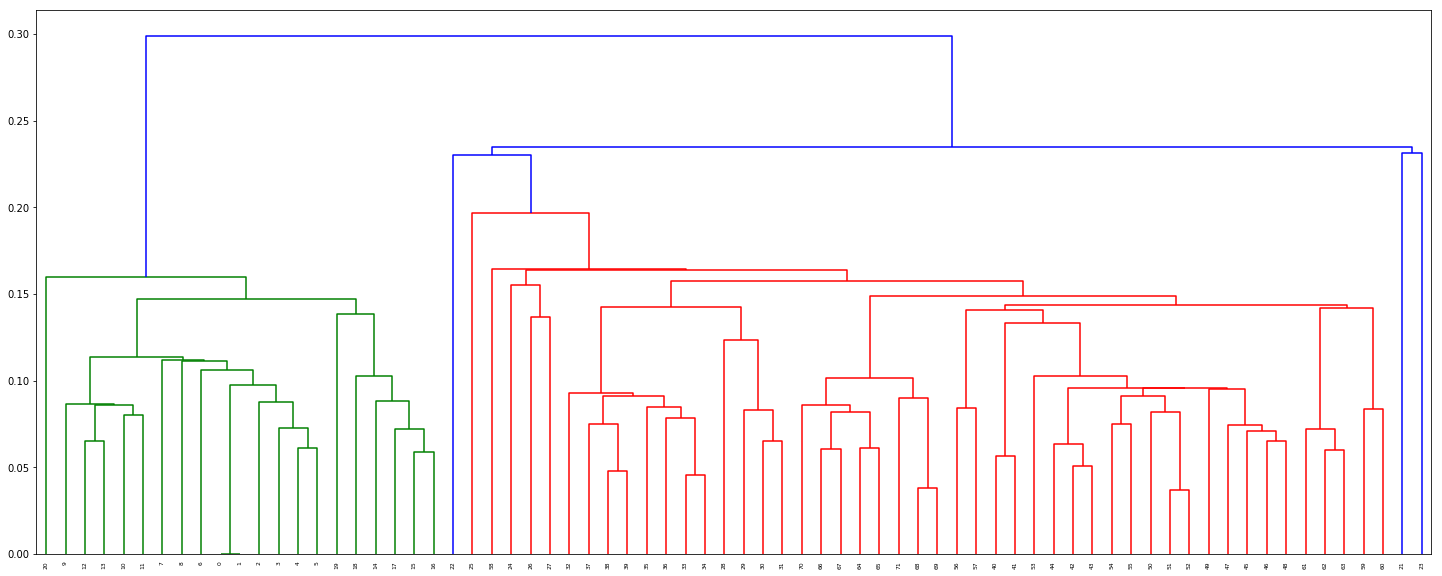

In [204]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(arr, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

##### as we can see there are two categories of exchange rate with 0.25 distance between them, so we can say there are two patterns for currency exchange rate

##### The reason may be that there is an overlap between countries' economies and their currencies